## Final Phase 2 Project Submission

Please fill out:
* Student name: Okuda Pascal
* Student pace:  part time
* Scheduled project review date/time: 26/03/2023
* Instructor name: Samwel Jane
* Blog post URL:


## Project Overview
For this project,regression modeling will be used to analyze house sales in a King County in NorthWestern.

## Business Problem
Real estate is considered real property that includes land and anything permanently attached to it or built on it, whether natural or man-made.These includes residential, commercial, industrial, raw land, and special use.

Investing in real estate includes purchasing a home, rental property, or land. Indirect investment in real estate can be made via Real Estate Investment Trusts or through pooled real estate investment.

A real estate agency helps homeowners buy and/or sell homes. The stakeholder is in the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.



## Analysis Objectives
1. Your deliverables should explicitly address each step of the data science process. 
2. Your Jupyter Notebook should demonstrate an iterative approach to modeling. This means that you begin with a basic model, evaluate it, and then provide justification for and proceed to a new model. After you finish refining your models, you should provide 1-3 paragraphs discussing your final model - this should include interpreting at least 3 important parameter estimates or statistics.
3. Based on the results of your models, your notebook and presentation should discuss at least two features that have strong relationships with housing prices.

In [1]:
# Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
# load the data in use and inspect the first 5 observations
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data preprocessing and preparation

In [3]:
# shape of the data
print(f'The housing data has {df.shape[0]} rows and {df.shape[1]} columns.')

The housing data has 21597 rows and 21 columns.


In [4]:
# column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# columns data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# data description
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Cleaning:

In [8]:
# Checking for duplicates in the data
print(f'We have {df.duplicated().sum()} duplicated cases in the housing dataset')

We have 0 duplicated cases in the housing dataset


In [9]:
# Check for sqft_basement variable
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

* We have a symbol ? in the data and I would recommend replace it with 0.0 and then convert to float data type

In [10]:
# Replace ? with '0.0' and convert to float type
df['sqft_basement'] = df['sqft_basement'].str.replace('?','0.0').astype(float)

In [11]:
# Inspect the missing cases
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

* Waterfront, view and yr_renovated have missing values.

In [12]:
#Replace all the missing values with the respective median values.
df['waterfront'] = df['waterfront'].fillna(df['waterfront'].median())
df['view'] = df['view'].fillna(df['view'].median())
df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_renovated'].median())

In [13]:
# Inspect missing in those 3 variables
df[['waterfront','view','yr_renovated']].isna().sum()

waterfront      0
view            0
yr_renovated    0
dtype: int64

* Categorical variables

### Data Analysis

Univariate Data Analysis

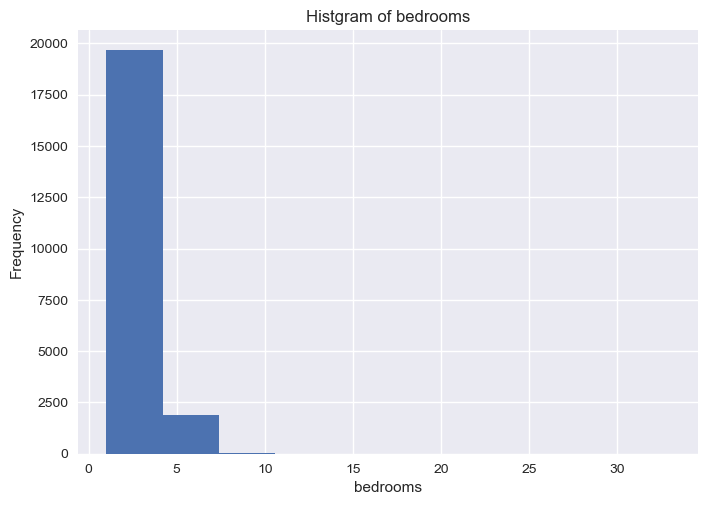

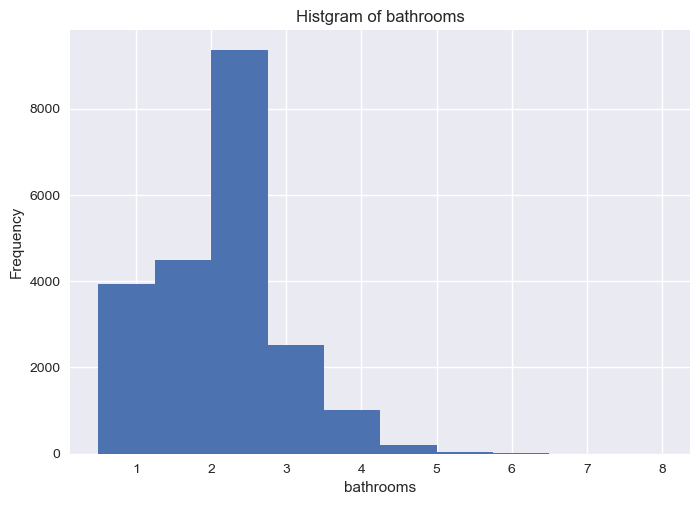

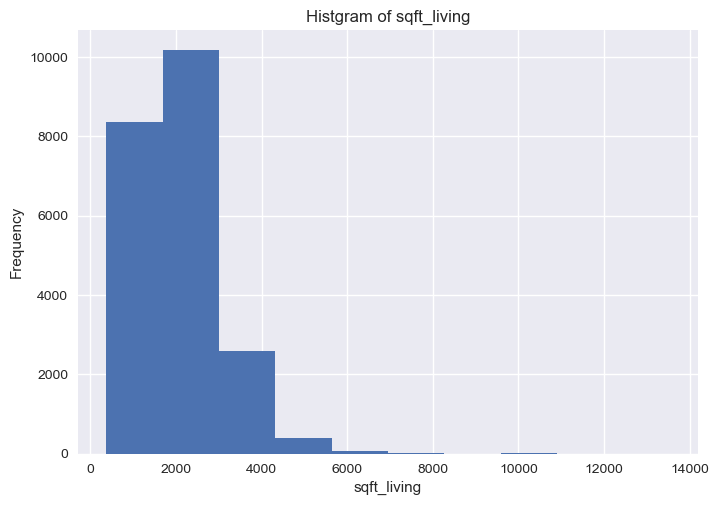

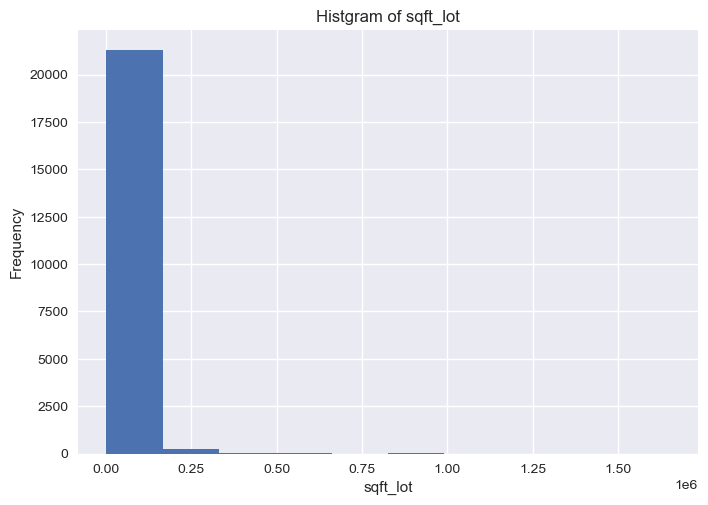

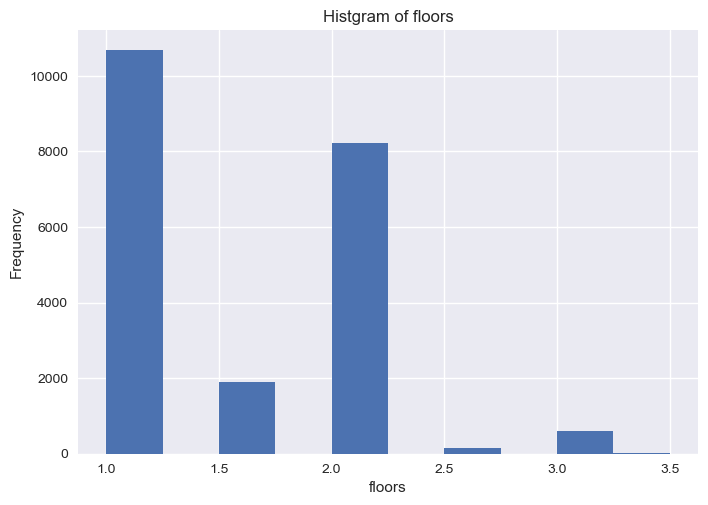

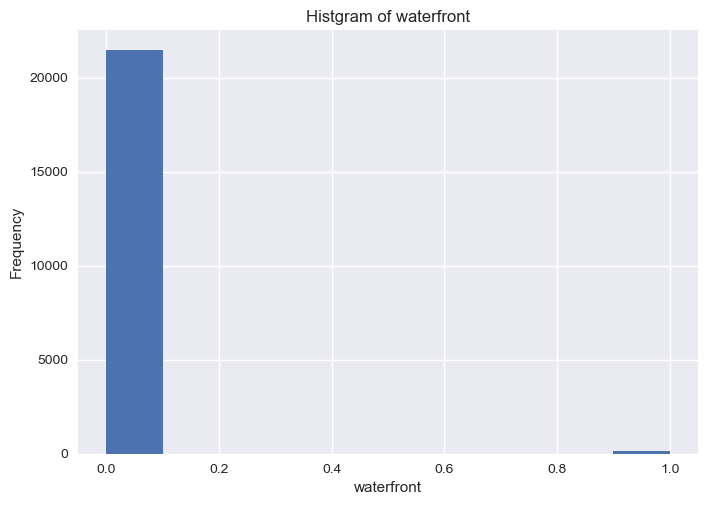

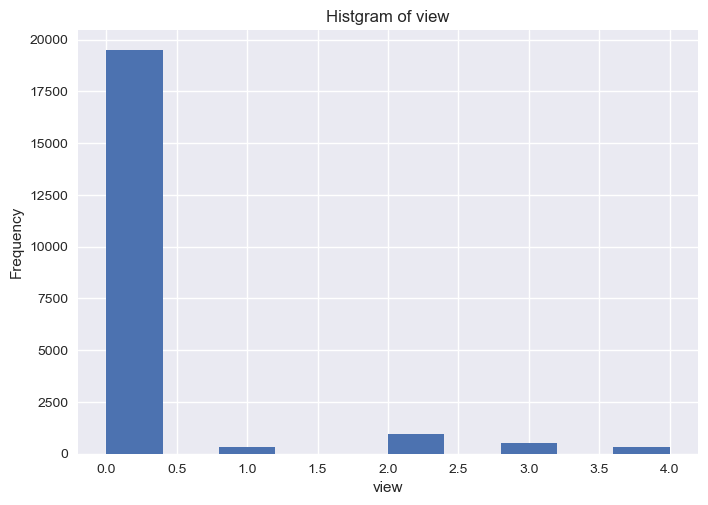

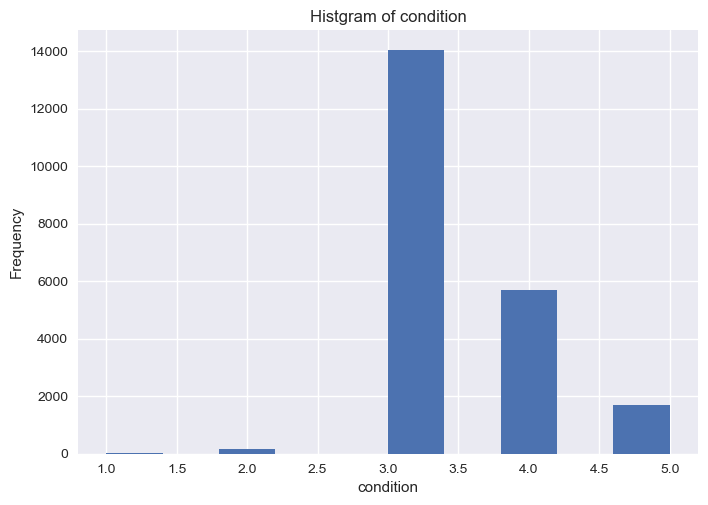

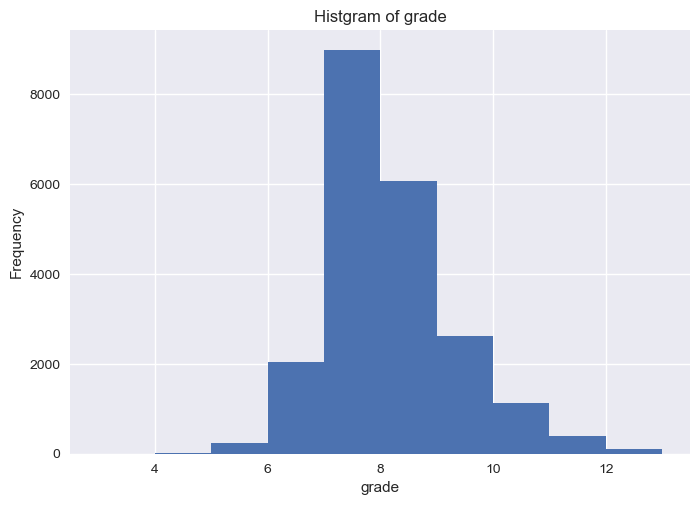

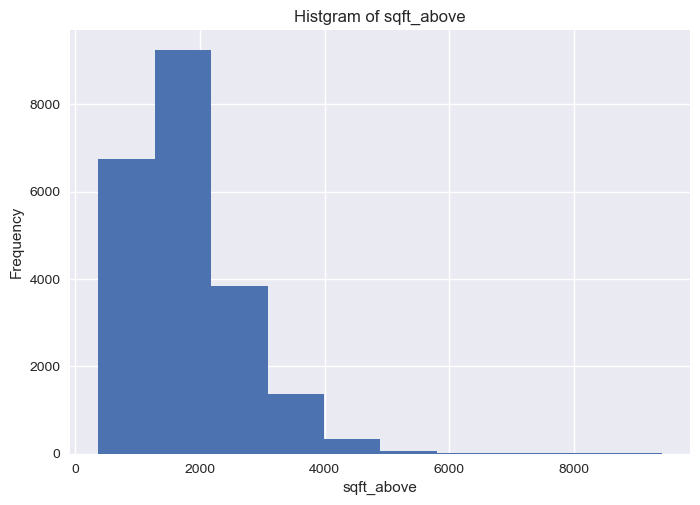

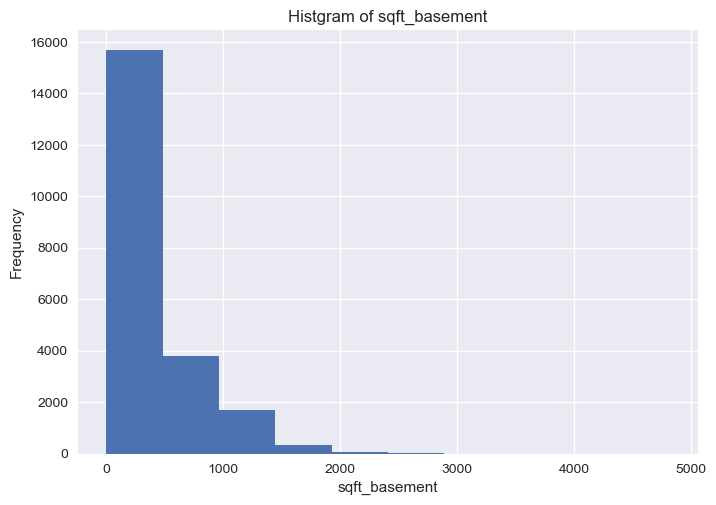

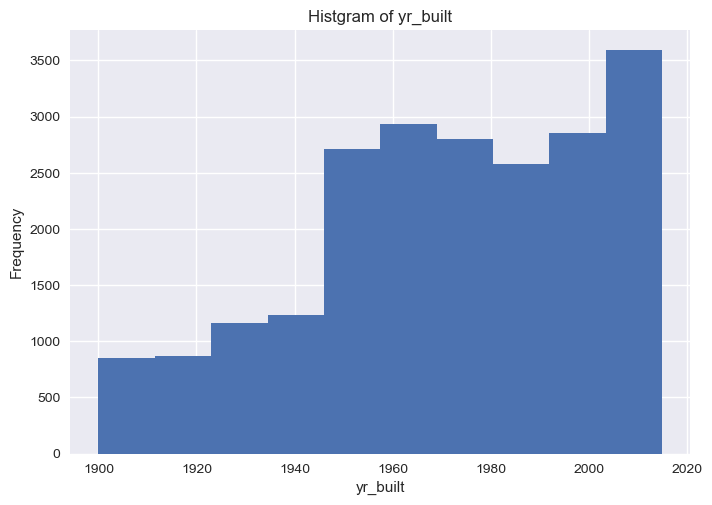

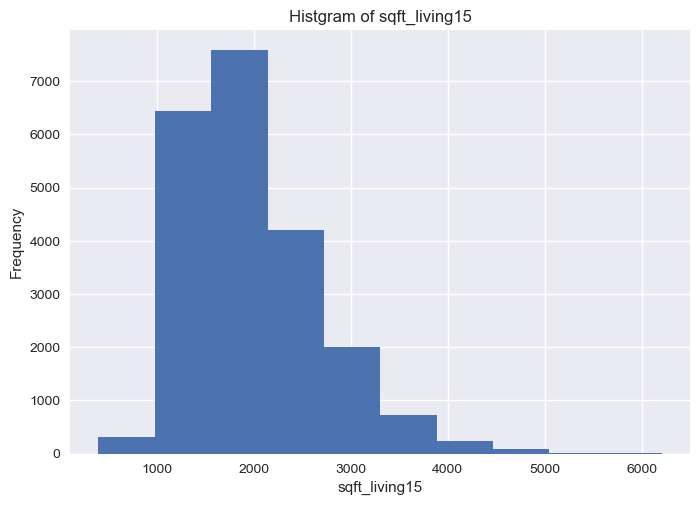

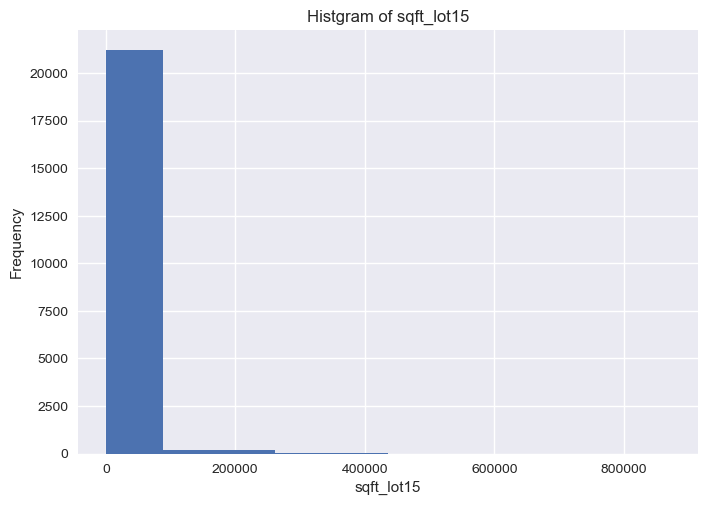

In [14]:
# histogram of the same 
column = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors', 'waterfront', 'view','condition',
          'grade','sqft_above', 'sqft_basement', 'yr_built','sqft_living15', 'sqft_lot15']
for col in column:
    plt.hist(df[col])
    plt.title(f"Histgram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

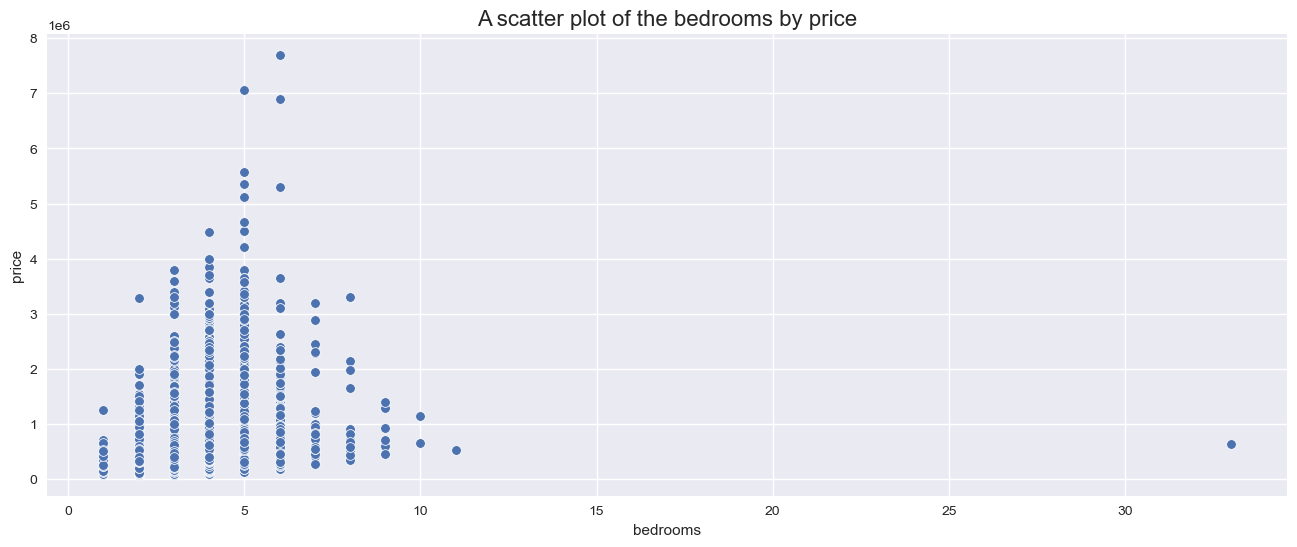

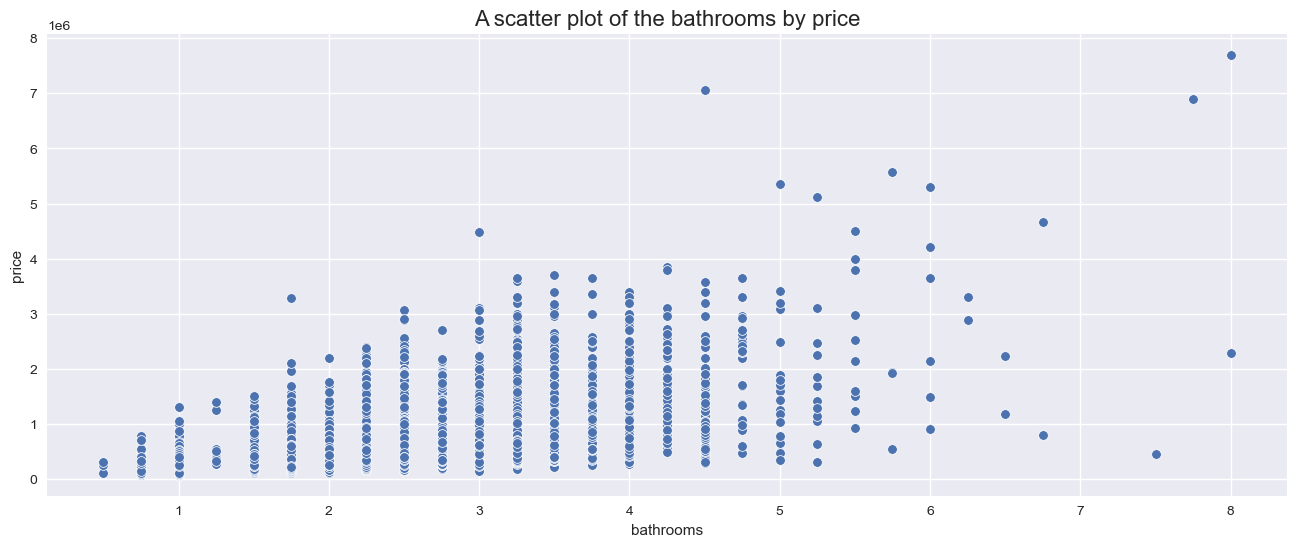

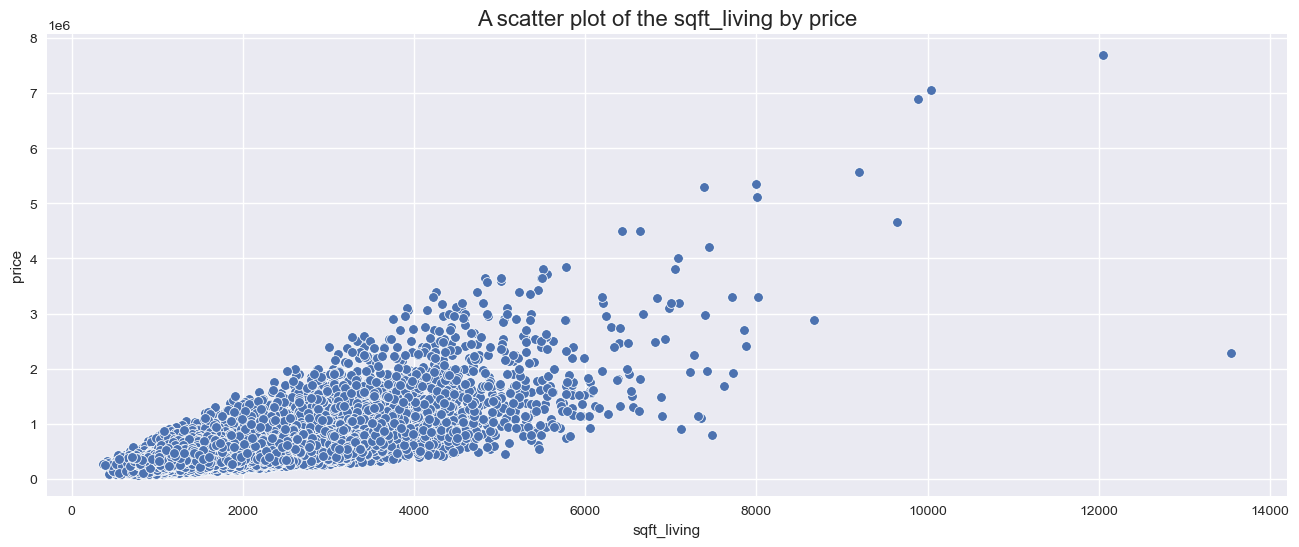

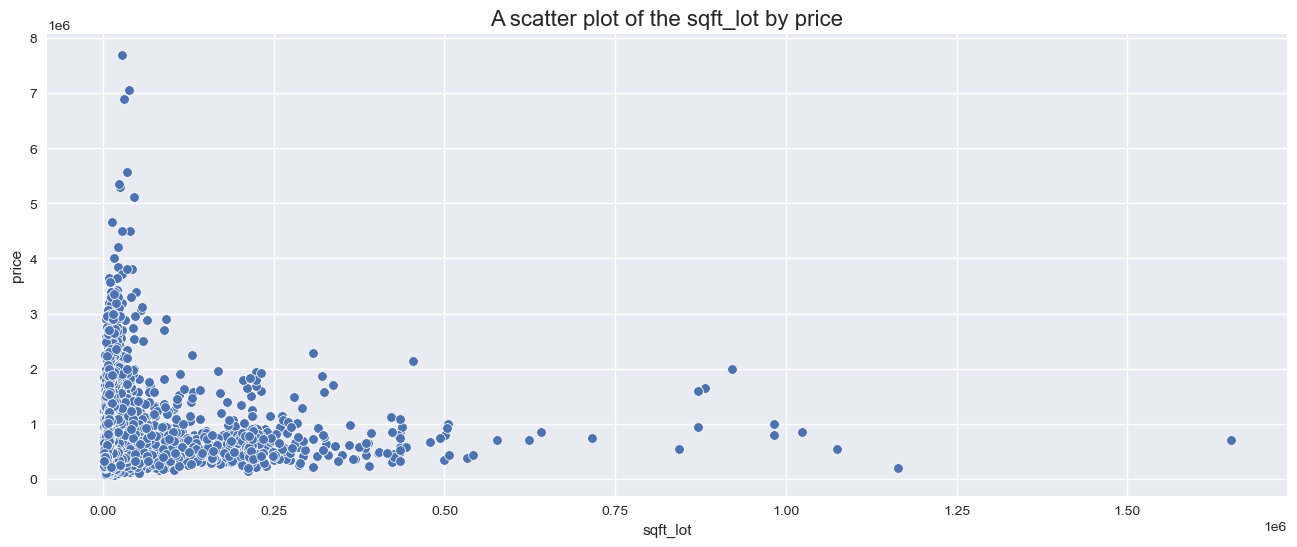

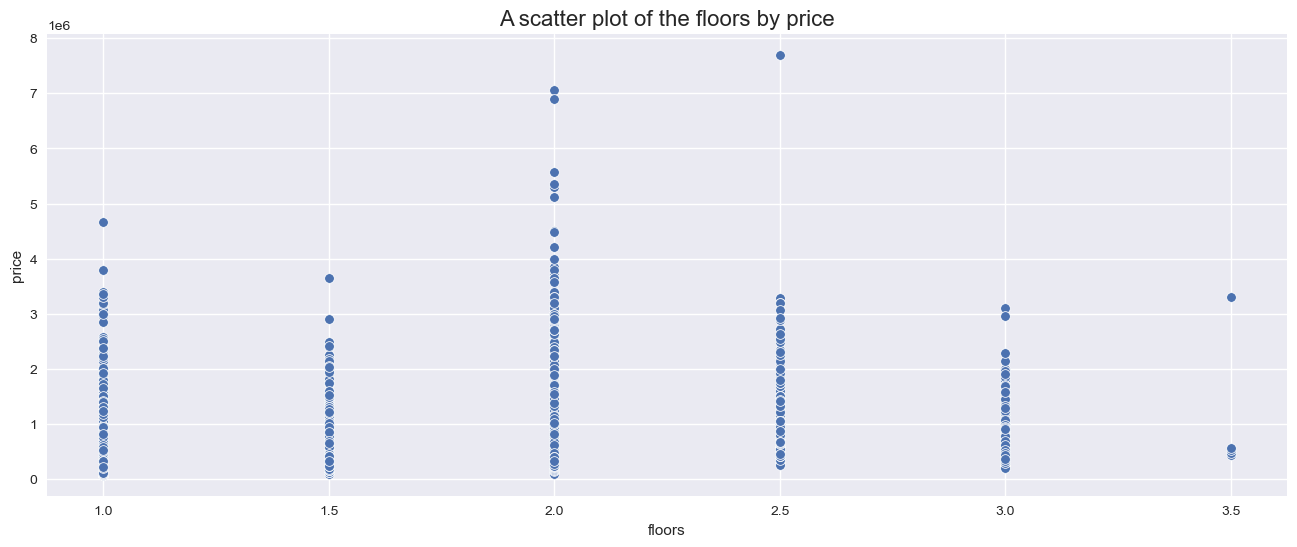

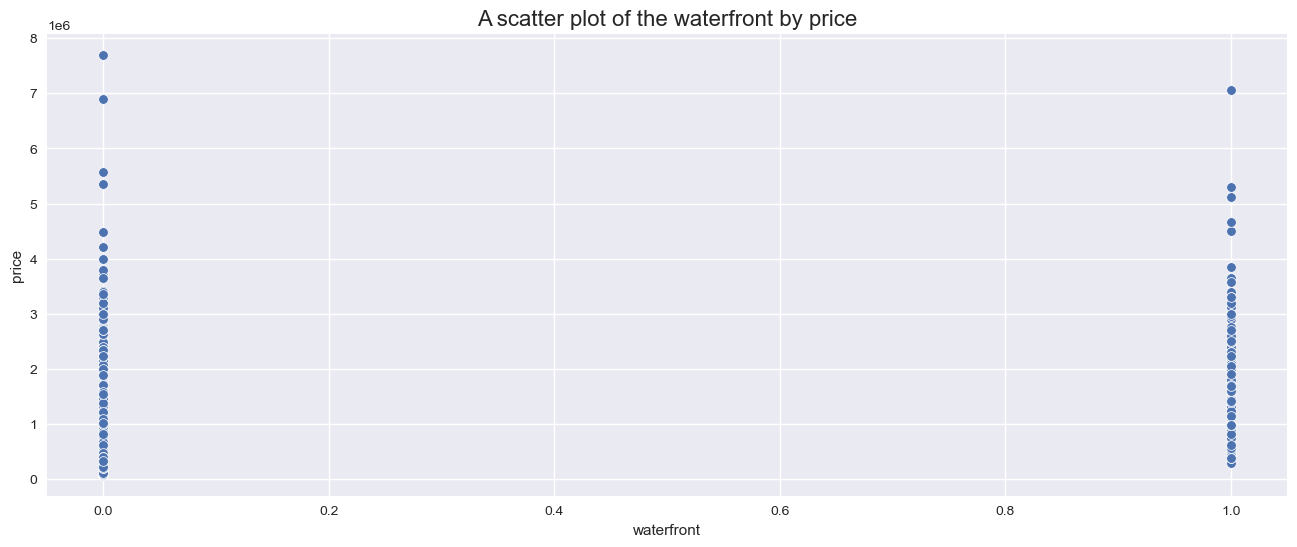

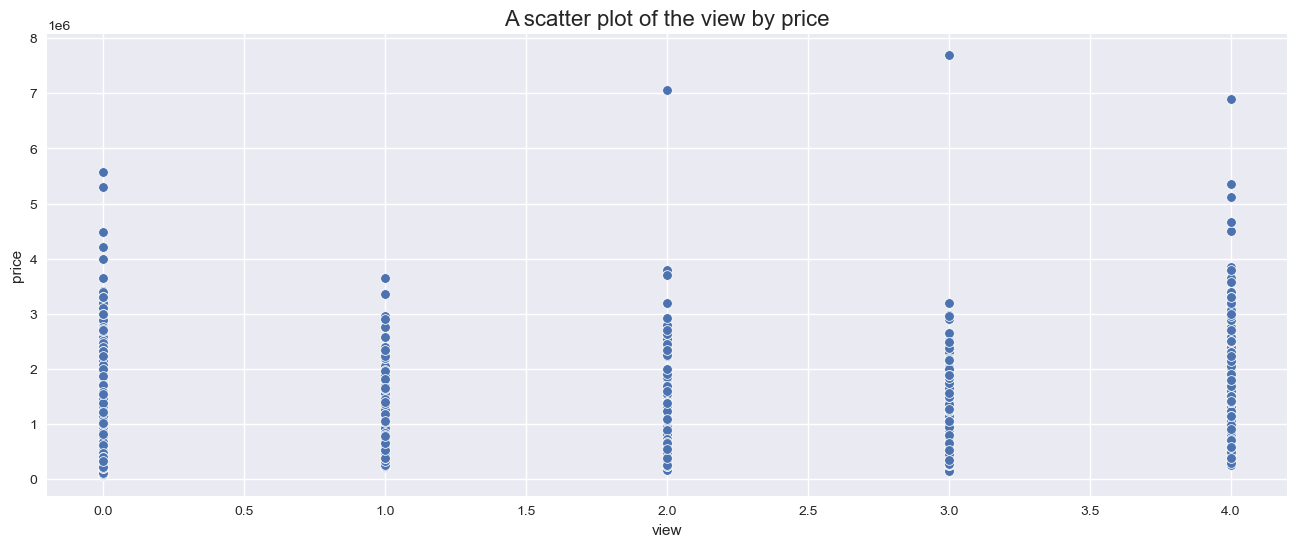

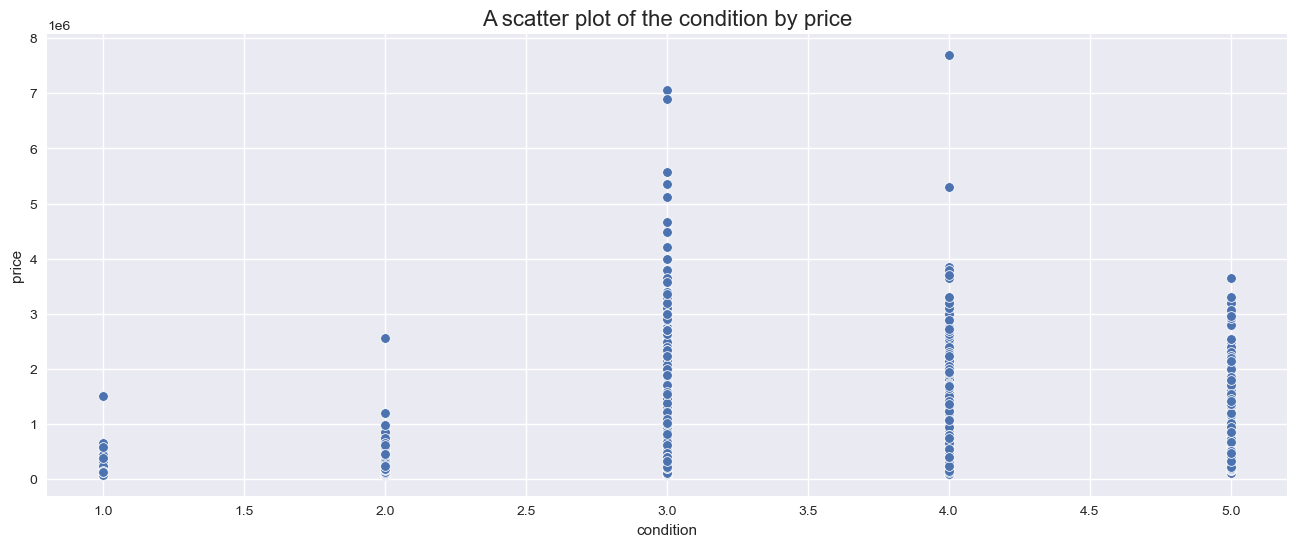

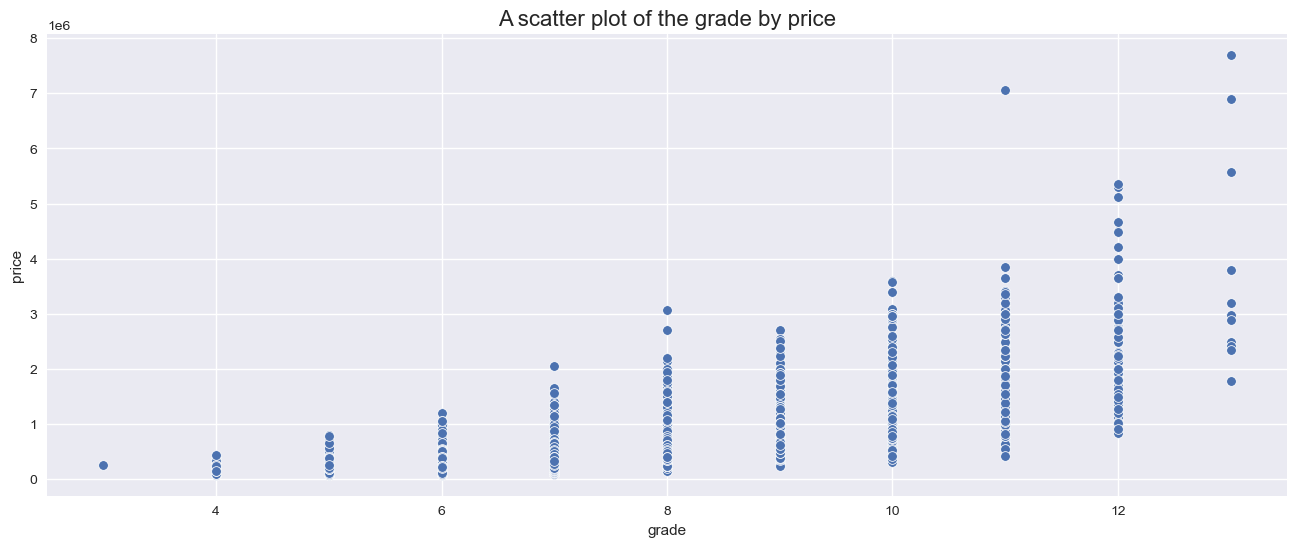

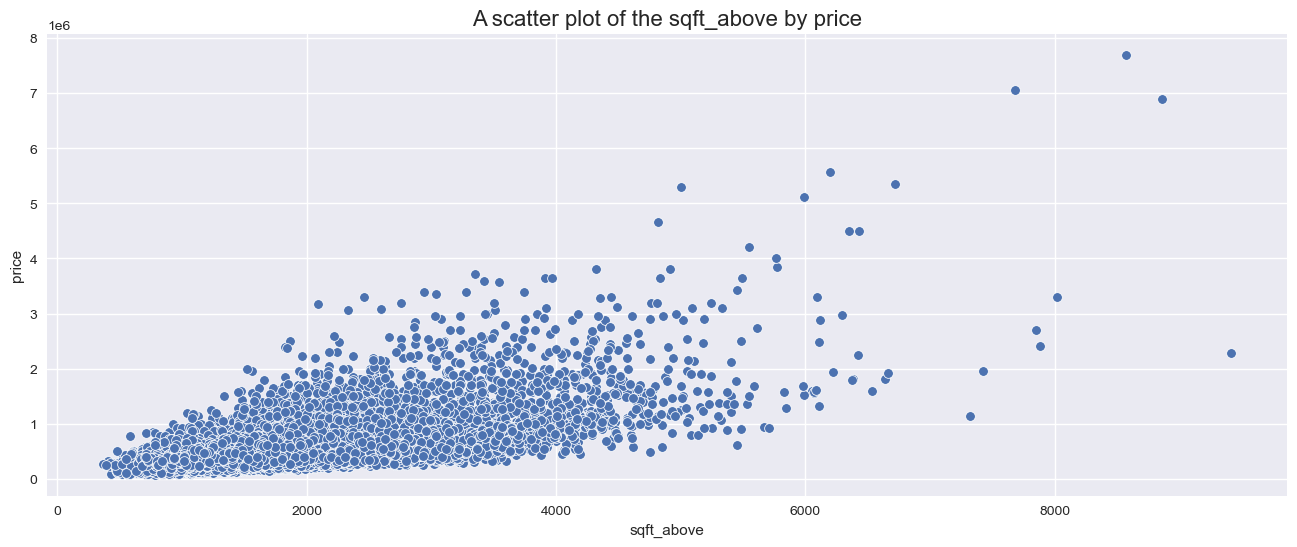

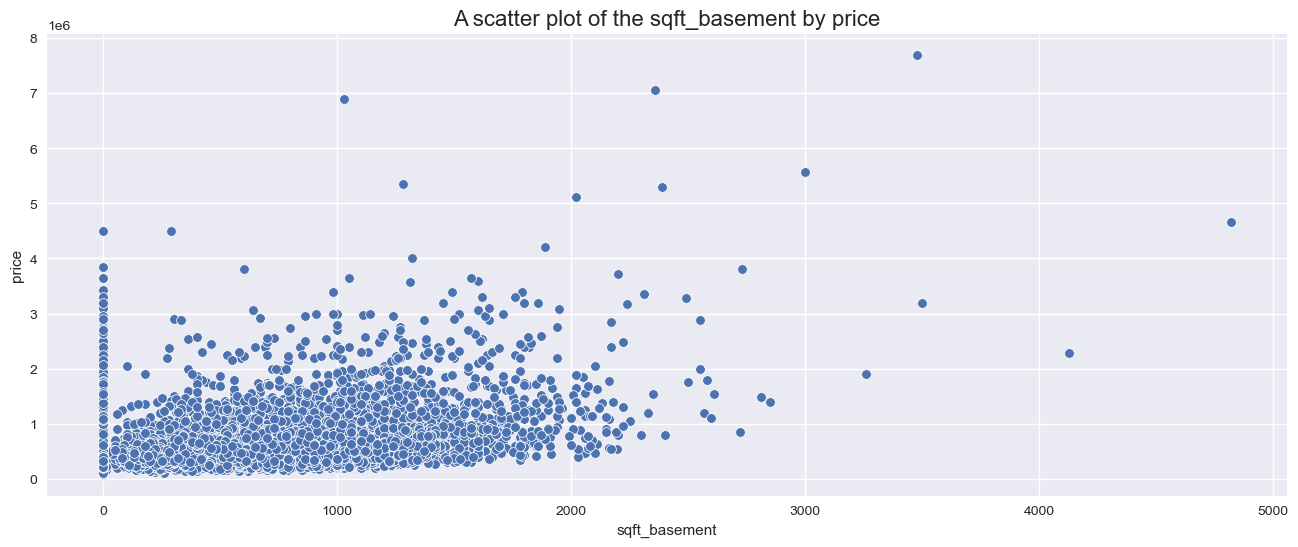

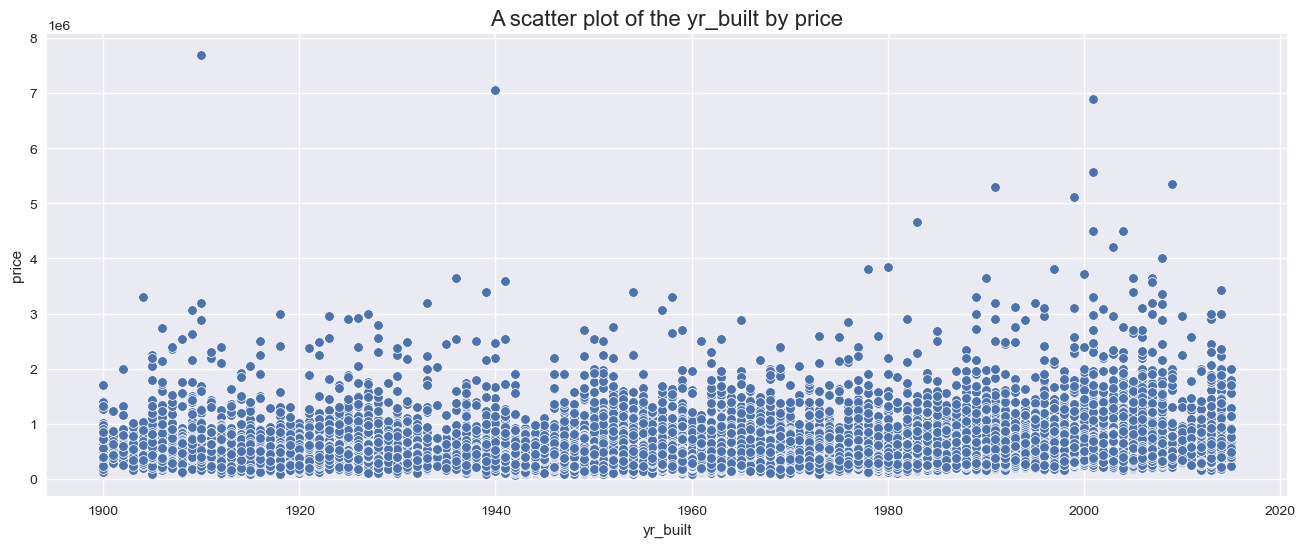

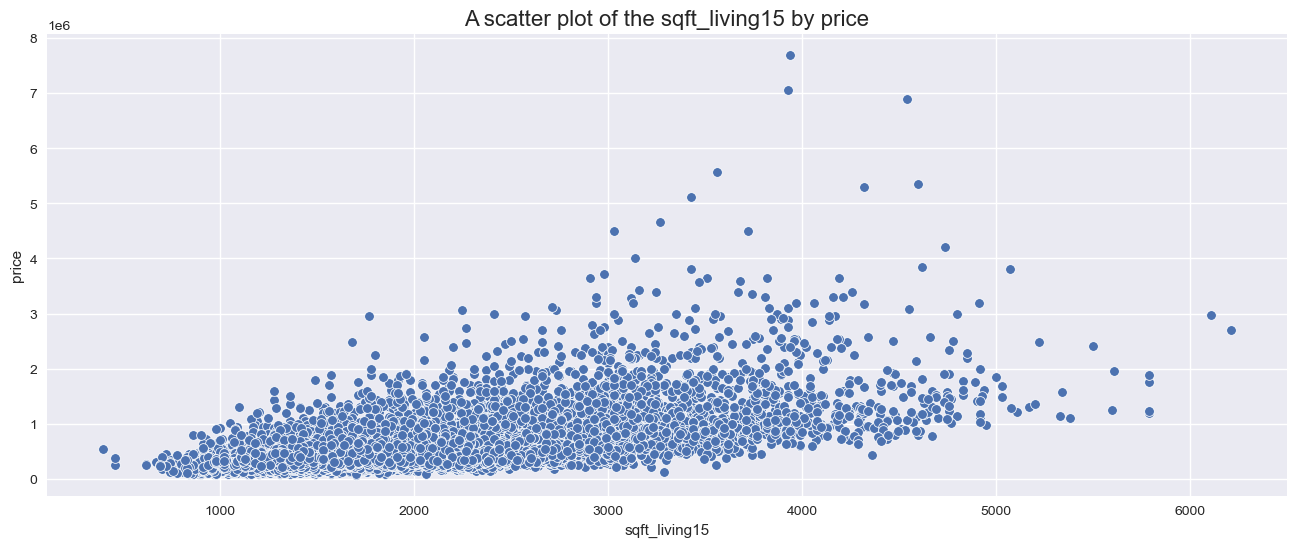

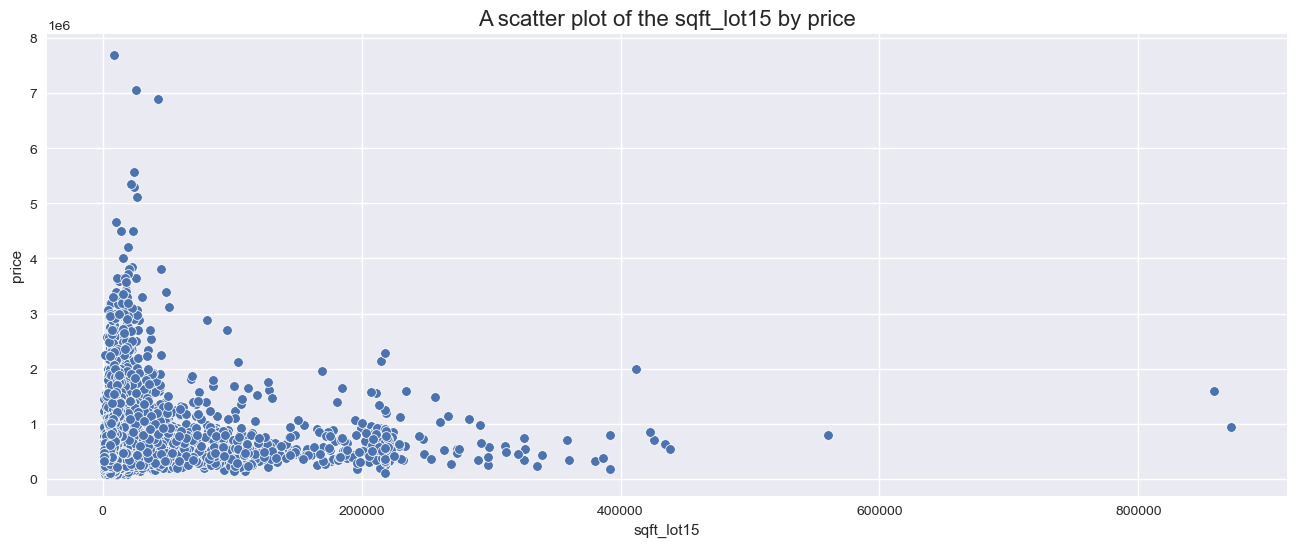

In [15]:
# A scatter of the same 
for col in column:
        plt.figure(figsize=(16,6))
        plt.title('A scatter plot of the ' + col+ ' by price',fontsize=(16))
        sns.scatterplot(data=df, x=col,y="price")

From the scatterplots above,we can say that floors, waterfront,view, condition and grade are the categorical variables

## Multicollinearity 

In [16]:
# Drop unnecessary variables/columns
drop_col = ['id', 'date', 'sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
df.drop(drop_col,axis = 1, inplace = True)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [17]:
# Inspect df variables
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

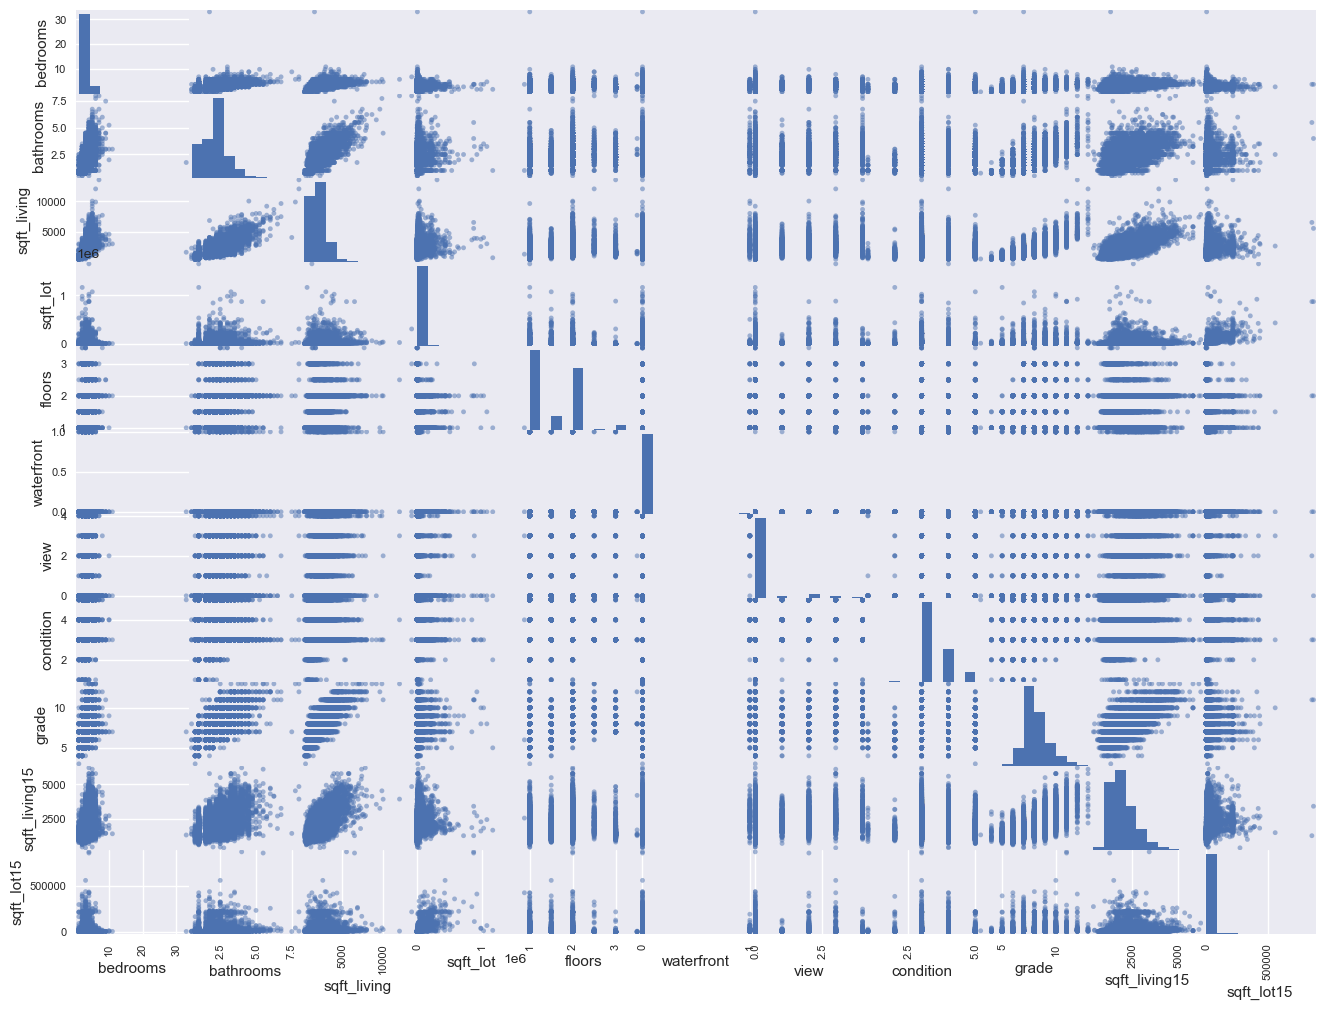

In [18]:
df_features = df.drop(['price'], axis=1)
pd.plotting.scatter_matrix(df_features,figsize  = [16, 12]);
plt.show()

In [19]:
# Correlation matrix
# Set absolute high correlation of above 0.75
features_corr = df_features.corr().abs().stack().reset_index().sort_values(0, ascending=False)
features_corr['pair'] = list(zip(features_corr.level_0 ,features_corr.level_1))
# Drop the level 0 and 1
features_corr.drop(columns=['level_1', 'level_0'], inplace = True)
features_corr.set_index(['pair'], inplace = True)
features_corr.columns = ['correlation']

In [20]:
features_corr[(features_corr.correlation>.75) & (features_corr.correlation <1)]

,correlation
pair,
"(grade, sqft_living)",0.762779
"(sqft_living, grade)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(sqft_living, sqft_living15)",0.756402
"(sqft_living, bathrooms)",0.755758
"(bathrooms, sqft_living)",0.755758


From the output above, sqft_living,grade,sqft_living15 and bathrooms are highly correlated. Drop the two variables to reduce on multicollinearlity

In [21]:
# drop the two columns
df_features.drop(columns =['grade','sqft_living15' , 'bathrooms'], axis = 1, inplace = True)

Altinatively, the heat map below demostrates a visual representation of the same.

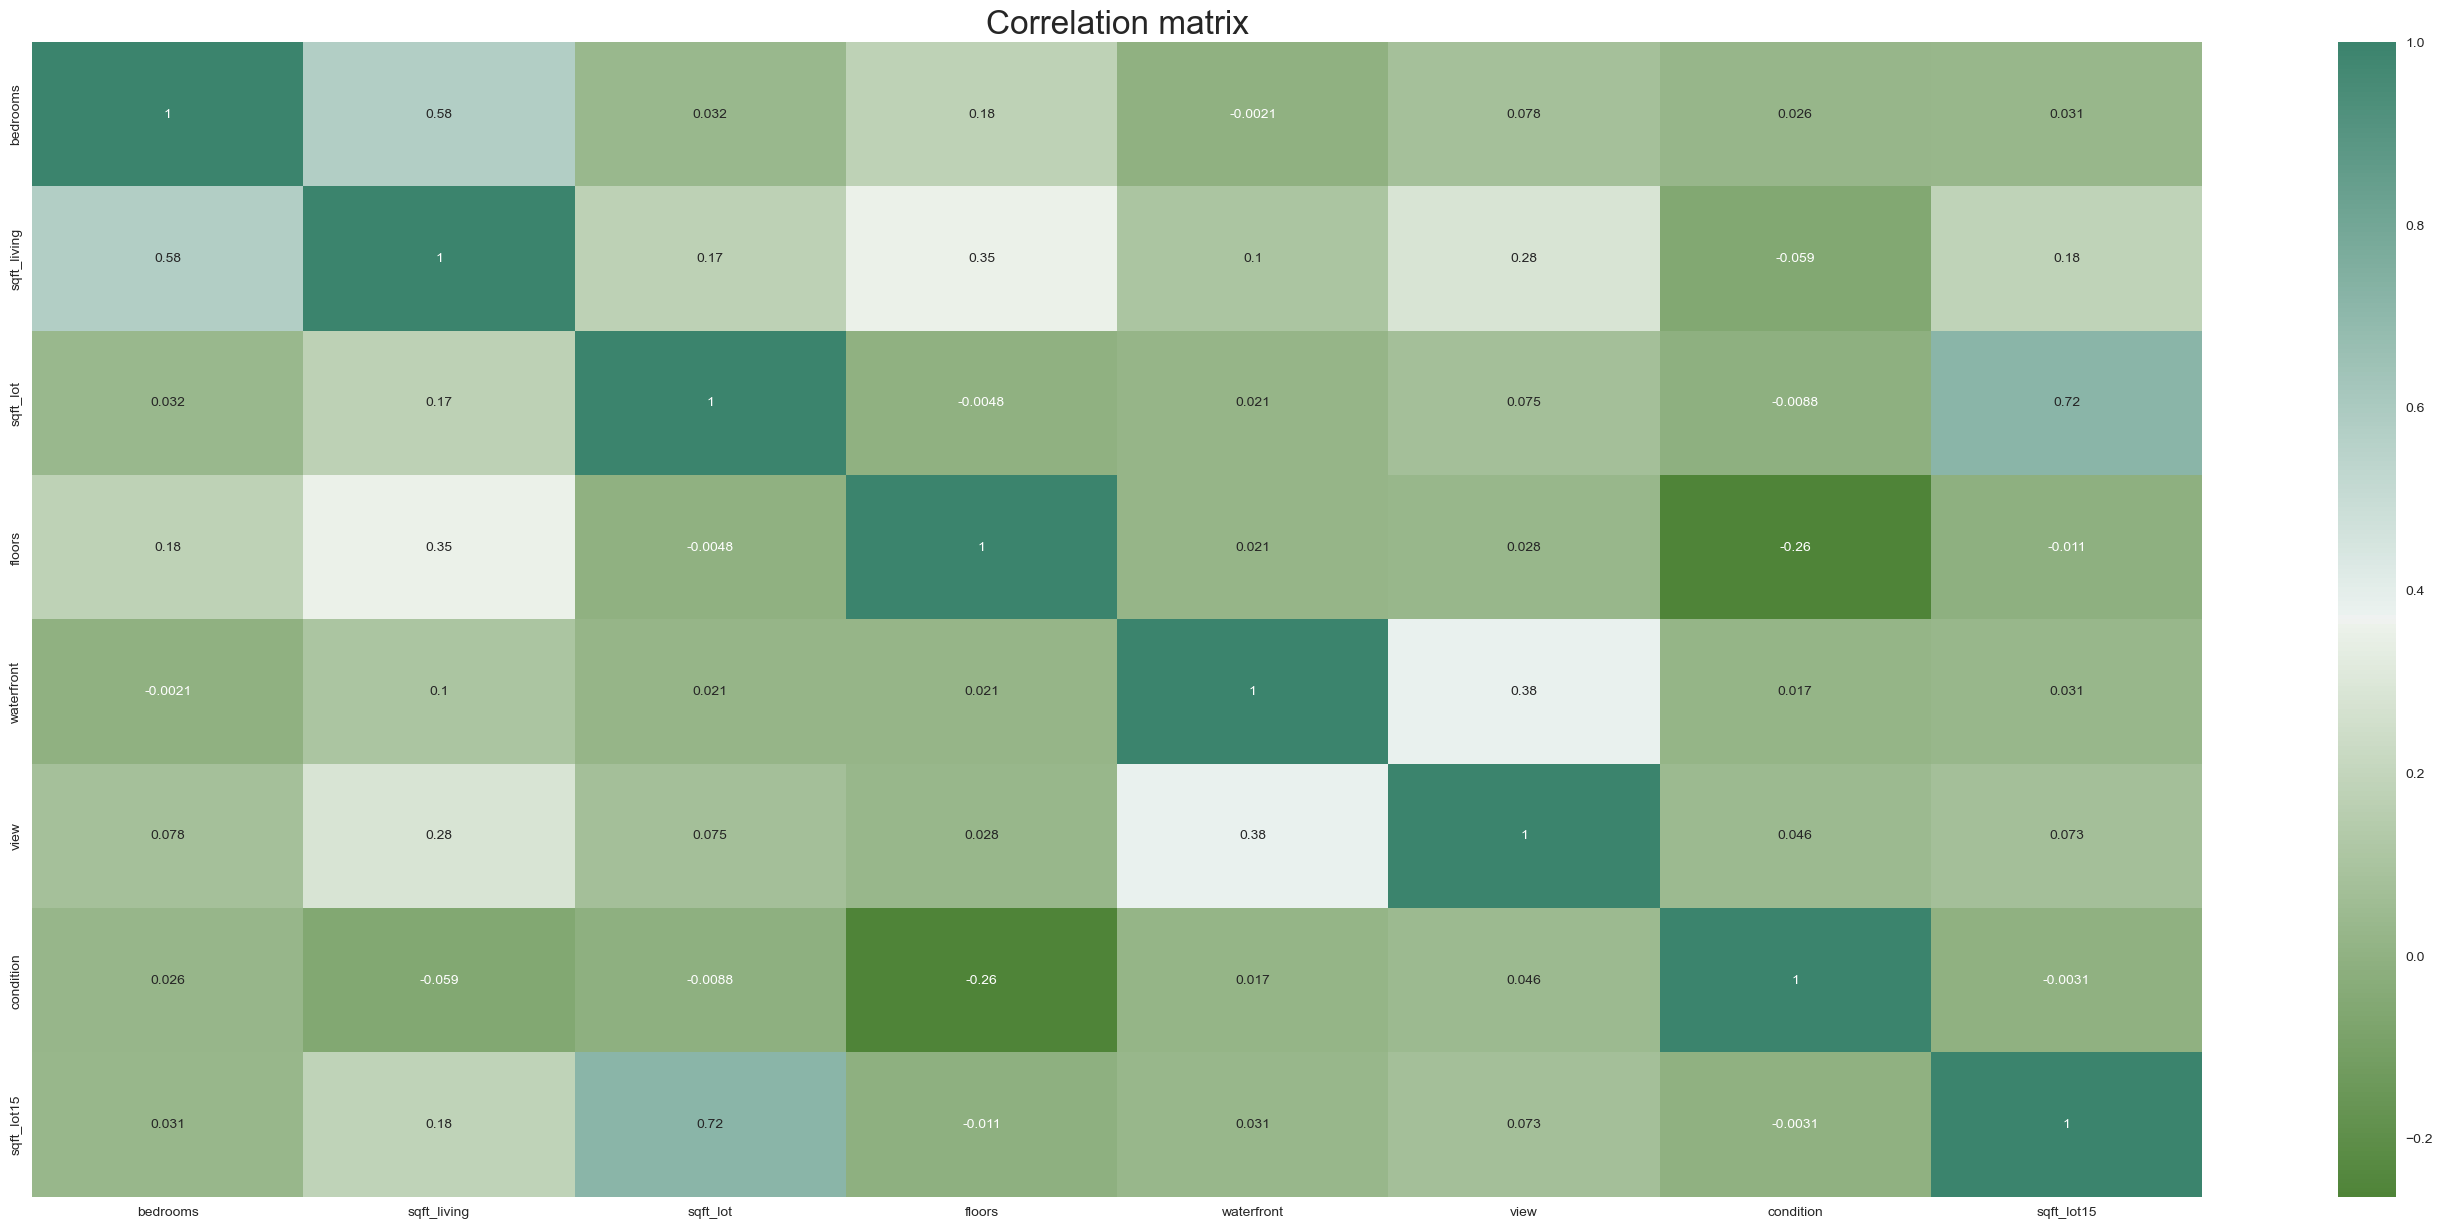

In [22]:
# Heatmap of correlation matrix
plt.figure(figsize = (35,15))
sns.heatmap(df_features.corr(), cmap=sns.diverging_palette(120, 160,n=760), annot = True);
sns.set_context('poster')
plt.title("Correlation matrix");

### Creating Dummy Variables
* From the histogram and the scatter plots aboves, we realised that floors, waterfront,view, condition and grade are categorical variables.
* I will now convert them to individual variables.

In [23]:
# Categorical variables. Floors and view are a numeric variable
cat_vars = ['waterfront', 'condition']

In [24]:
# Inspect the number of categories in individual categorical variables
df_features[['waterfront', 'condition']].nunique()

waterfront    2
condition     5
dtype: int64

Waterfront has 2 categories. We will finally consider condition and view as the categorical variables and convert eact category into a a single column.

In [25]:
# Condition and grade cats
condition_dummies = pd.get_dummies(df_features['condition'], prefix = 'cond', drop_first=True)
condition_dummies

,cond_2,cond_3,cond_4,cond_5
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
21592,0,1,0,0
21593,0,1,0,0
21594,0,1,0,0
21595,0,1,0,0


In [26]:
#drop the two columns
df_features.drop(columns = ['condition'],axis = 1,inplace = True)

In [27]:
# Merge the dummy columns
df_features_1 = pd.concat([df_features,condition_dummies], axis = 1)
df. head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1800,7503


In [28]:
df_features_1.columns

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_lot15', 'cond_2', 'cond_3', 'cond_4', 'cond_5'],
      dtype='object')

# Scaling the numerical variable

 I will be scaling bedrooms, sqft_living,sqft_lot,sqft_lot15 using their means.

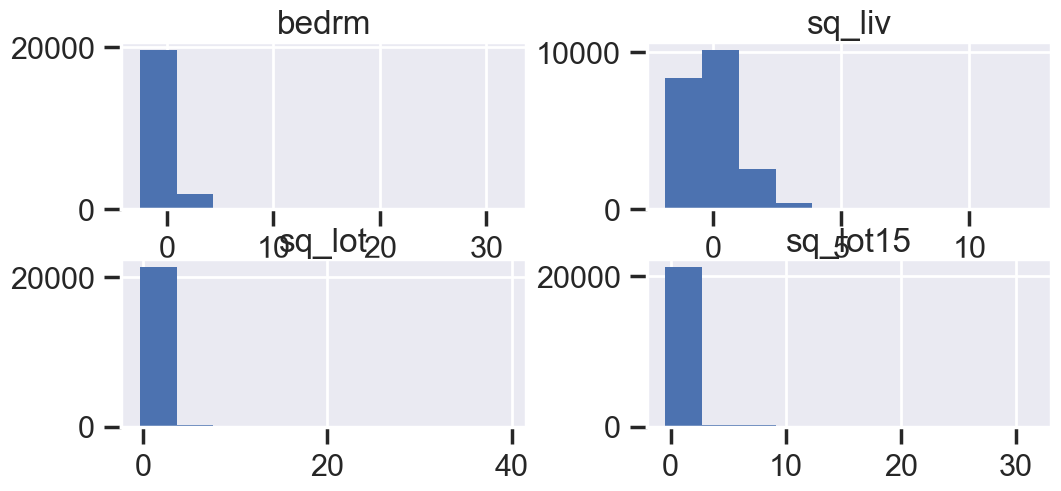

In [34]:
bedrm = df_features_1['bedrooms']
sq_liv = df_features_1['sqft_living']
sq_lot = df_features_1['sqft_lot']
sq_lot15 = df_features_1['sqft_lot15']

scaled_bedrm = (bedrm - np.mean(bedrm)) / np.sqrt(np.var(bedrm))
scaled_sq_liv = (sq_liv - np.mean(sq_liv)) / np.sqrt(np.var(sq_liv))
scaled_sq_lot = (sq_lot - np.mean(sq_lot)) / np.sqrt(np.var(sq_lot))
scaled_sq_lot15 = (sq_lot15 - np.mean(sq_lot15)) / np.sqrt(np.var(sq_lot15))

df_cont_scaled = pd.DataFrame([])
df_cont_scaled['bedrm'] = scaled_bedrm
df_cont_scaled['sq_liv'] = scaled_sq_liv
df_cont_scaled['sq_lot'] = scaled_sq_lot
df_cont_scaled['sq_lot15'] = scaled_sq_lot15

df_cont_scaled.hist(figsize = [12, 5]);

 Drop the original variables and attach the scaled variables.

In [35]:
df_features_1.drop(columns=['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_lot15'],axis = 1, inplace=True)
df_features_1.columns

Index(['floors', 'waterfront', 'view', 'cond_2', 'cond_3', 'cond_4', 'cond_5'], dtype='object')

In [36]:
# Add the scaled variables
df_features_1 = pd.concat([df_features_1,df_cont_scaled],axis = 1)

In [37]:
# Confirm the columns
df_features_1.columns

Index(['floors', 'waterfront', 'view', 'cond_2', 'cond_3', 'cond_4', 'cond_5',
       'bedrm', 'sq_liv', 'sq_lot', 'sq_lot15'],
      dtype='object')

In [38]:
# import the necessary modules
from sklearn.model_selection import train_test_split

In [39]:
features =['floors', 'waterfront', 'view', 'cond_2', 'cond_3', 'cond_4', 'cond_5',
       'bedrm', 'sq_liv', 'sq_lot', 'sq_lot15']    
X = df_features_1[features ]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples :", len(x_test))
print("number of training samples:",len(x_train))

number of test samples : 3240
number of training samples: 18357


# Simple Linear Regression

In [40]:
#combined data
df_features_2 =pd.concat([X,Y], axis = 1)

In [41]:
# Import regression libraries
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

In [42]:
# Run the simple linear regrssion between each predictor variables and the outcome variable
for feature in features:
    formula = f'price ~ {feature}'
    model = ols(formula = formula, data = df_features_2).fit()
    print(f'******************************************************************************')
    print(f'Simple Linear Regression output for: {feature}')
    print(f'******************************************************************************')
    print(model.summary())

******************************************************************************
Simple Linear Regression output for: floors
******************************************************************************
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1525.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):          2.57e-322
Time:                        11:44:05   Log-Likelihood:            -3.0665e+05
No. Observations:               21597   AIC:                         6.133e+05
Df Residuals:                   21595   BIC:                         6.133e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
        

******************************************************************************
Simple Linear Regression output for: cond_5
******************************************************************************
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     71.71
Date:                Sat, 25 Mar 2023   Prob (F-statistic):           2.65e-17
Time:                        11:44:06   Log-Likelihood:            -3.0736e+05
No. Observations:               21597   AIC:                         6.147e+05
Df Residuals:                   21595   BIC:                         6.147e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
        

From the above simple linear regression output, only sqft living has a slightly higher R-squared value of 49.3% making the best predictor.

# sqft_living simple linear regression

In [43]:
# Run the sqft_living linear regression
formula = f'price ~ sq_liv'
model = ols(formula = formula, data = df_features_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:44:15   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.403e+05   1780.543    303.445      0.000    5.37e+05    5.44e+05
sq_liv      2.579e+05   1780.543    144.819      0.000    2.54e+05    2.61e+05
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Simple linear regression output interpretation

In [44]:
print(f"The square feet living has a coefficient of {model.conf_int()[1]['sq_liv']} \n The p_value of the model is {model.pvalues['sq_liv']} \n The model R-squared is {model.rsquared}")
print("-----------------------------------------------------------------")
print('The model is able to explain only 49.3% variation of the data')


The square feet living has a coefficient of 261346.07942557186 
 The p_value of the model is 0.0 
 The model R-squared is 0.49268789904035093
-----------------------------------------------------------------
The model is able to explain only 49.3% variation of the data


eval_env: 1


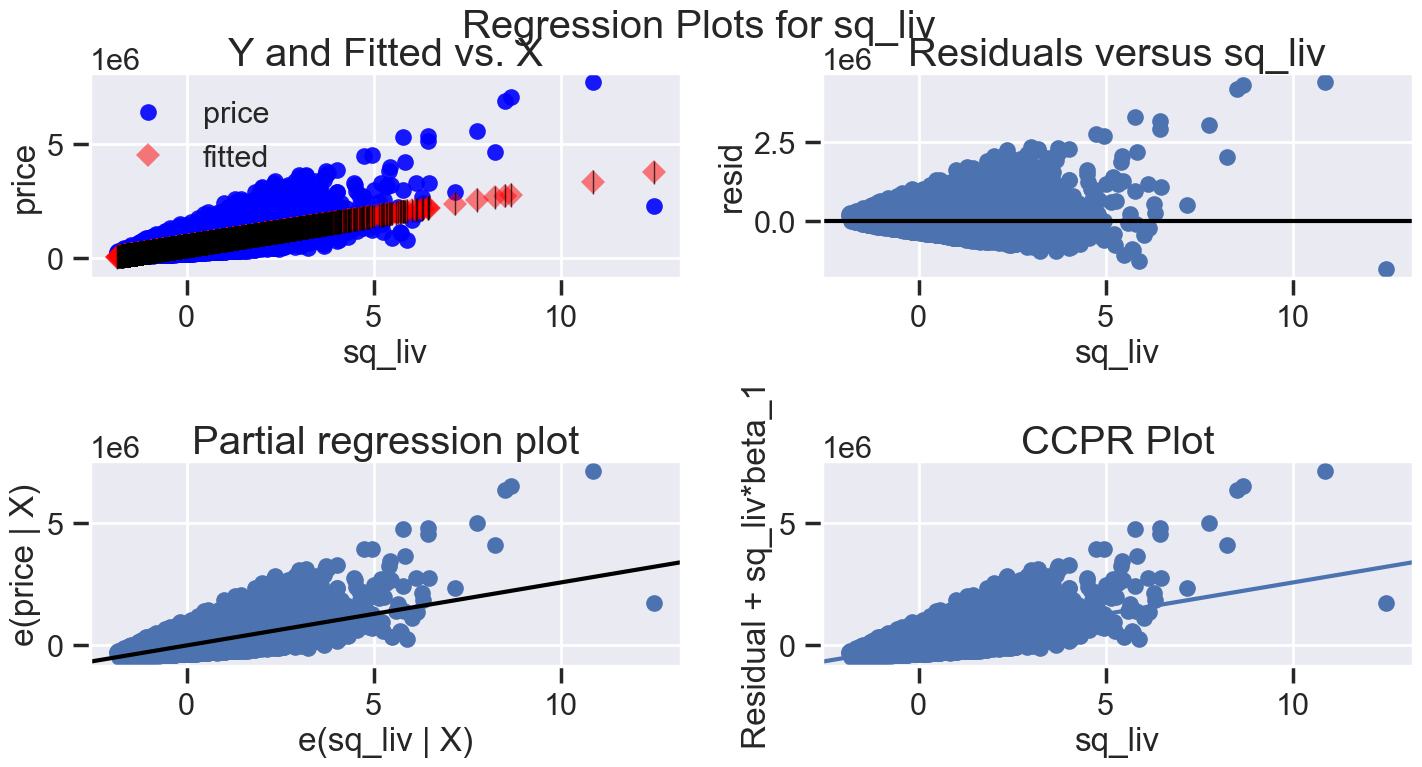

In [45]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sq_liv', fig=fig)
plt.show()

In [46]:
print(f"The Y and Fitted vs. X graph plots shows a positive relationship shows that price and square feet living are \ncorrelated. An increase in one causes an increases to the other.")
print(f"-------------------------------------------------------------------------------------------------------------")
print(f"The Residuals versus sqft_living graph shows the model errors versus the predictor variable.")
print(f"-------------------------------------------------------------------------------------------------------------")
print(f"The Partial regression plot shows the relationship between price and square feet living")
print(f"-------------------------------------------------------------------------------------------------------------")

The Y and Fitted vs. X graph plots shows a positive relationship shows that price and square feet living are 
correlated. An increase in one causes an increases to the other.
-------------------------------------------------------------------------------------------------------------
The Residuals versus sqft_living graph shows the model errors versus the predictor variable.
-------------------------------------------------------------------------------------------------------------
The Partial regression plot shows the relationship between price and square feet living
-------------------------------------------------------------------------------------------------------------


### Normality assumptions in the sqft living predictor

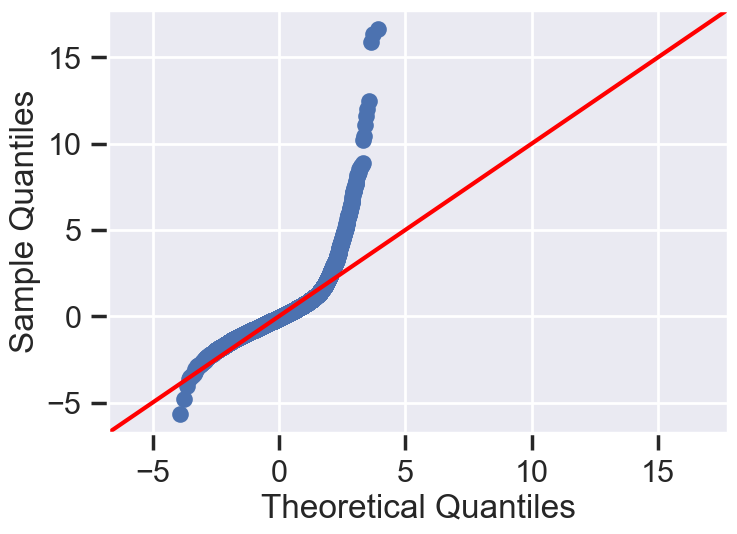

In [47]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

From the model output on the Jarque-Bera (JB) being greater than 6 and the normality plot above, we can conclude that the data is not normally distributed

# Multiple Linear Regression

In [48]:
# Set up the multiple regression: 3 variables
formula = 'price ~ sq_liv+floors+waterfront'
model = ols(formula=formula, data=df_features_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     8106.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:45:35   Log-Likelihood:            -2.9925e+05
No. Observations:               21597   AIC:                         5.985e+05
Df Residuals:                   21593   BIC:                         5.985e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.211e+05   5361.940     97.181      0.000    5.11e+05    5.32e+05
sq_liv      2.487e+05   1843.170    134.942      0.000    2.45e+05    2.52e+05
floors      8945.4481   3397.350      2.633      0.008    2286.391    1.56e+04
waterfront  8.661e+05    2.1e+04     41.160      0.000    8.25e+05    9.07e+05
==============================================================================
Omnibus:                    13477.128   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           441819.220
Skew:                           2.482   Prob(JB):                         0.00
Kurtosis:                      24.595   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 The R-squared is 53.0%

In [49]:
# Set up the multiple regression: 4 variables
formula = 'price ~ sq_liv+floors+waterfront+view'
model = ols(formula=formula, data=df_features_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     6615.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:45:42   Log-Likelihood:            -2.9875e+05
No. Observations:               21597   AIC:                         5.975e+05
Df Residuals:                   21592   BIC:                         5.976e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.922e+05   5319.536     92.519      0.000    4.82e+05    5.03e+05
sq_liv      2.325e+05   1872.685    124.148      0.000    2.29e+05    2.36e+05
floors      1.726e+04   3331.035      5.180      0.000    1.07e+04    2.38e+04
waterfront  6.078e+05   2.21e+04     27.480      0.000    5.64e+05    6.51e+05
view        7.826e+04   2464.032     31.761      0.000    7.34e+04    8.31e+04
==============================================================================
Omnibus:                    13657.581   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           504645.874
Skew:                           2.492   Prob(JB):                         0.00
Kurtosis:                      26.151   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared is 55.1%. Adding view variable improves the model accuracy

In [50]:
# Set up the multiple regression: 5 variables
formula = 'price ~ sq_liv+floors+waterfront+view+sq_lot15'
model = ols(formula=formula, data=df_features_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     5347.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:45:46   Log-Likelihood:            -2.9869e+05
No. Observations:               21597   AIC:                         5.974e+05
Df Residuals:                   21591   BIC:                         5.974e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.966e+05   5319.214     93.354      0.000    4.86e+05    5.07e+05
sq_liv      2.365e+05   1901.455    124.369      0.000    2.33e+05     2.4e+05
floors      1.424e+04   3332.590      4.274      0.000    7710.649    2.08e+04
waterfront  6.089e+05   2.21e+04     27.610      0.000    5.66e+05    6.52e+05
view        7.862e+04   2457.255     31.995      0.000    7.38e+04    8.34e+04
sq_lot15     -1.9e+04   1706.293    -11.136      0.000   -2.23e+04   -1.57e+04
==============================================================================
Omnibus:                    13528.613   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490037.440
Skew:                           2.463   Prob(JB):                         0.00
Kurtosis:                      25.810   Cond. No.                         24.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared is 55.3%. Adding view variable improves the model accuracy

 Adding all the variables in the system to see if the R-squared value will be improved.

In [51]:
# Define outcome and predictor variables + formula 
outcome = 'price'
predictors = df_features_2.drop('price',axis = 1)
pred = '+'.join(predictors.columns)
formula = outcome + '~' + pred

In [52]:
model = ols(formula = formula, data = df_features_2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2595.
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:45:55   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21585   BIC:                         5.967e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.655e+05   4.51e+04     10.331      0.000    3.77e+05    5.54e+05
floors      2.591e+04   3429.322      7.556      0.000    1.92e+04    3.26e+04
waterfront  5.872e+05   2.17e+04     27.089      0.000    5.45e+05     6.3e+05
view        7.183e+04   2425.596     29.613      0.000    6.71e+04    7.66e+04
cond_2     -5647.2127   4.85e+04     -0.117      0.907   -1.01e+05    8.93e+04
cond_3     -3881.6892   4.49e+04     -0.086      0.931   -9.18e+04    8.41e+04
cond_4      3.691e+04   4.49e+04      0.822      0.411   -5.11e+04    1.25e+05
cond_5      1.044e+05   4.52e+04      2.310      0.021    1.58e+04    1.93e+05
bedrm      -4.678e+04   2042.073    -22.906      0.000   -5.08e+04   -4.28e+04
sq_liv      2.656e+05   2278.177    116.595      0.000    2.61e+05     2.7e+05
sq_lot      -884.7041   2365.591     -0.374      0.708   -5521.438    3752.030
sq_lot15   -2.165e+04   2373.256     -9.124      0.000   -2.63e+04    -1.7e+04
==============================================================================
Omnibus:                    13323.968   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           463978.472
Skew:                           2.420   Prob(JB):                         0.00
Kurtosis:                      25.185   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpretation of the multiple regression output

In [53]:
print(f"The R-squared of the multiple regression model is 56.9% meaning the model variation of the data is accounted by the model is 56.9%")


The R-squared of the multiple regression model is 56.9% meaning the model variation of the data is accounted by the model is 56.9%


# Model validation

In [54]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [55]:
# define predictor abd outcome datasets
pred_df = df_features_2.drop('price', axis=1)
Outcome_df = df['price']

In [56]:
# List the train and test datasets
dat = ['pred_df_train','pred_df_test','Outcome_df_train','Outcome_df_test']
for a in dat:
    print(a)

pred_df_train
pred_df_test
Outcome_df_train
Outcome_df_test


In [57]:
# Split the data into training and test sets and insepct the counts
pred_df_train,pred_df_test,Outcome_df_train,Outcome_df_test = train_test_split(pred_df,Outcome_df, test_size=.2, random_state = 10)

print(f"pred_df_train: {len(pred_df_train)},\npred_df_test: {len(pred_df_test)}, \nOutcome_df_train: {len(Outcome_df_train)}, \nOutcome_df_test: {len(Outcome_df_test)}")

pred_df_train: 17277,
pred_df_test: 4320, 
Outcome_df_train: 17277, 
Outcome_df_test: 4320


In [59]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(pred_df_train, Outcome_df_train)

Outcome_df_hat_train = linreg.predict(pred_df_train)
Outcome_df_hat_test = linreg.predict(pred_df_test)

In [60]:
# residual analysis
train_residuals = Outcome_df_hat_train - Outcome_df_train
test_residuals = Outcome_df_hat_test - Outcome_df_test
mse_train = float(np.sum((Outcome_df_train - Outcome_df_hat_train)**2)/len(Outcome_df_train))
mse_test = float(np.sum((Outcome_df_test - Outcome_df_hat_test)**2)/len(Outcome_df_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: 58128364134.46463
Test Mean Squared Error: 58124423776.20212


In [61]:
assert mse_train>mse_test

# Conclusion


From the analysis, it was noted that square feet of living have a strong positive correlation with the house pricing.